In [3]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import linear_model
from sklearn.cluster import KMeans
from sklearn import metrics
from pandas import DataFrame

In [4]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [8]:
pd.DataFrame(iris.data,columns = iris.feature_names)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
iris_frame = pd.DataFrame(iris.data,columns = iris.feature_names)
# Делаем имена колонок такие же, как имена переменных:
# Добавляем столбец с целевой переменной:
iris_frame['target'] = iris.target
# Для наглядности добавляем столбец с сортами:
iris_frame['name'] = iris_frame['target'].map(lambda x : iris.target_names[x])
iris_frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [10]:
iris_frame.name

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: name, Length: 150, dtype: object

In [11]:
iris_frame.groupby(['name']).mean()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
name,,,,,
setosa,5.006,3.428,1.462,0.246,0.0
versicolor,5.936,2.770,4.260,1.326,1.0
virginica,6.588,2.974,5.552,2.026,2.0


In [12]:
iris_frame.groupby(['name']).var()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
name,,,,,
setosa,0.124249,0.143690,0.030159,0.011106,0.0
versicolor,0.266433,0.098469,0.220816,0.039106,0.0
virginica,0.404343,0.104004,0.304588,0.075433,0.0


In [13]:
iris_frame.groupby(['name']).corr()

sepal length (cm)  sepal width (cm)  \
name                                                                
setosa     sepal length (cm)           1.000000          0.742547   
           sepal width (cm)            0.742547          1.000000   
           petal length (cm)           0.267176          0.177700   
           petal width (cm)            0.278098          0.232752   
           target                           NaN               NaN   
versicolor sepal length (cm)           1.000000          0.525911   
           sepal width (cm)            0.525911          1.000000   
           petal length (cm)           0.754049          0.560522   
           petal width (cm)            0.546461          0.663999   
           target                           NaN               NaN   
virginica  sepal length (cm)           1.000000          0.457228   
           sepal width (cm)            0.457228          1.000000   
           petal length (cm)           0.864225          0.401045   
           petal width (cm)            0.281108          0.537728   
           target                           NaN               NaN   

                              petal length (cm)  petal width (cm)  target  
name                                                                       
setosa     sepal length (cm)           0.267176          0.278098     NaN  
           sepal width (cm)            0.177700          0.232752     NaN  
           petal length (cm)           1.000000          0.331630     NaN  
           petal width (cm)            0.331630          1.000000     NaN  
           target                           NaN               NaN     NaN  
versicolor sepal length (cm)           0.754049          0.546461     NaN  
           sepal width (cm)            0.560522          0.663999     NaN  
           petal length (cm)           1.000000          0.786668     NaN  
           petal width (cm)            0.786668          1.000000     NaN  
           target                           NaN               NaN     NaN  
virginica  sepal length (cm)           0.864225          0.281108     NaN  
           sepal width (cm)            0.401045          0.537728     NaN  
           petal length (cm)           1.000000          0.322108     NaN  
           petal width (cm)            0.322108          1.000000     NaN  
           target                           NaN               NaN     NaN

In [14]:
iris_frame.iloc[:,:4].corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


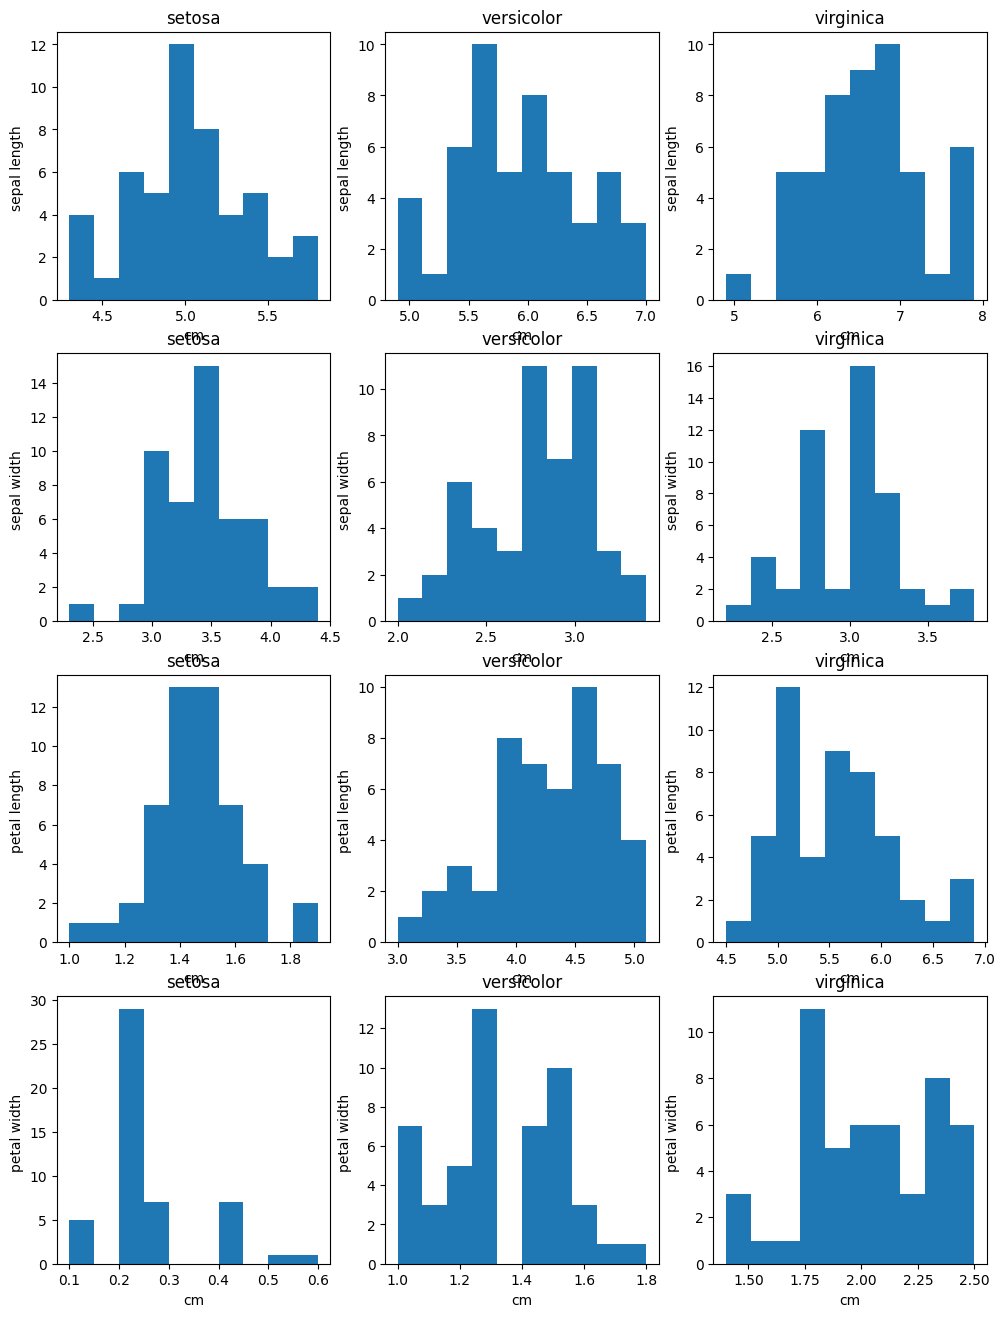

In [15]:
import matplotlib.pyplot as pyplot

pyplot.figure(figsize = (12, 16))
plot_number = 0
for feature_name in iris['feature_names']:
    for target_name in iris['target_names']:
        plot_number += 1
        pyplot.subplot(4, 3, plot_number)
        #pyplot.hist(iris_frame[iris_frame.name == target_name][feature_name])
        pyplot.hist(iris_frame.loc[iris_frame['name'] == target_name,feature_name])
        pyplot.title(target_name)
        pyplot.xlabel('cm')
        pyplot.ylabel(feature_name[:-4])

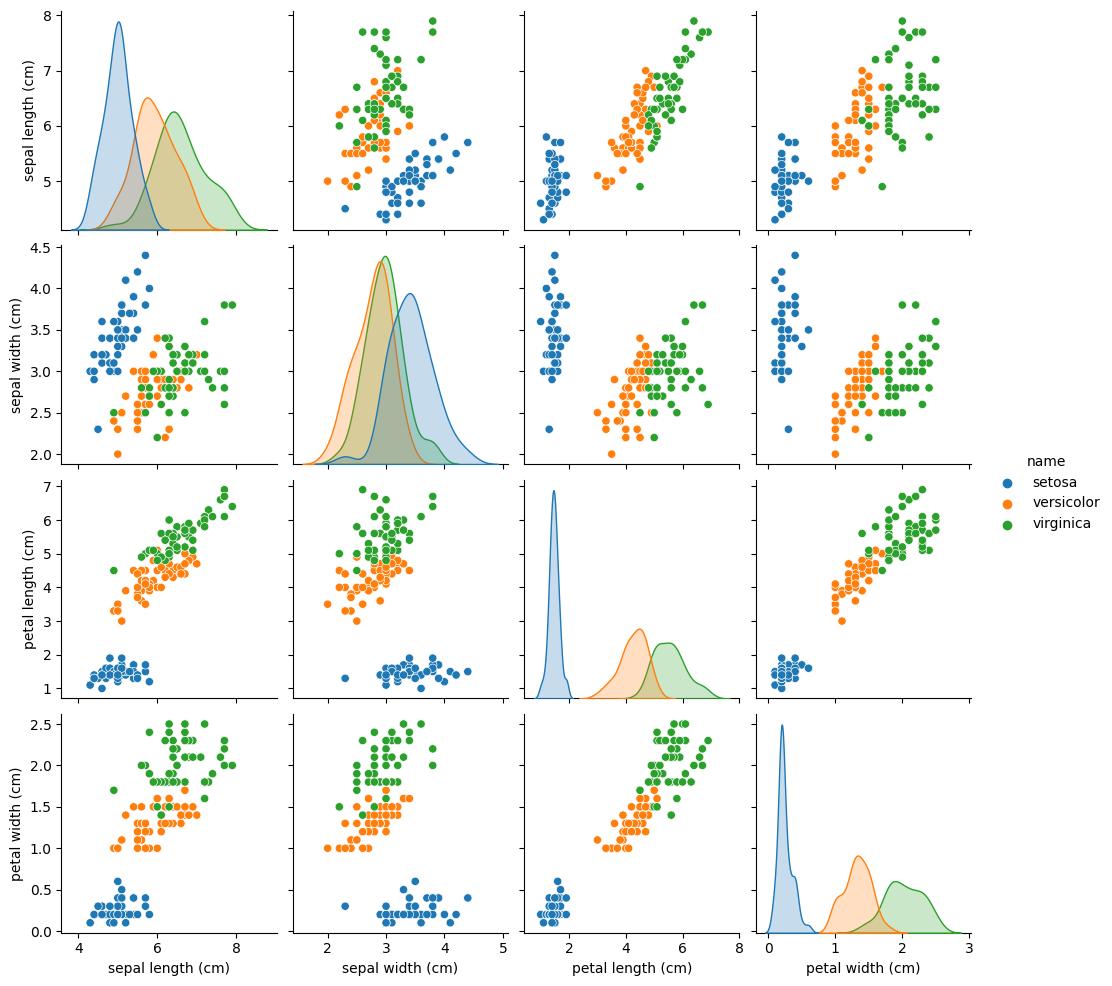

In [16]:
import seaborn as sns

#sns.pairplot(iris_frame.iloc[:,:4])#, hue = 'name')
sns.pairplot(iris_frame.iloc[:,[0,1,2,3,5]], hue = 'name')

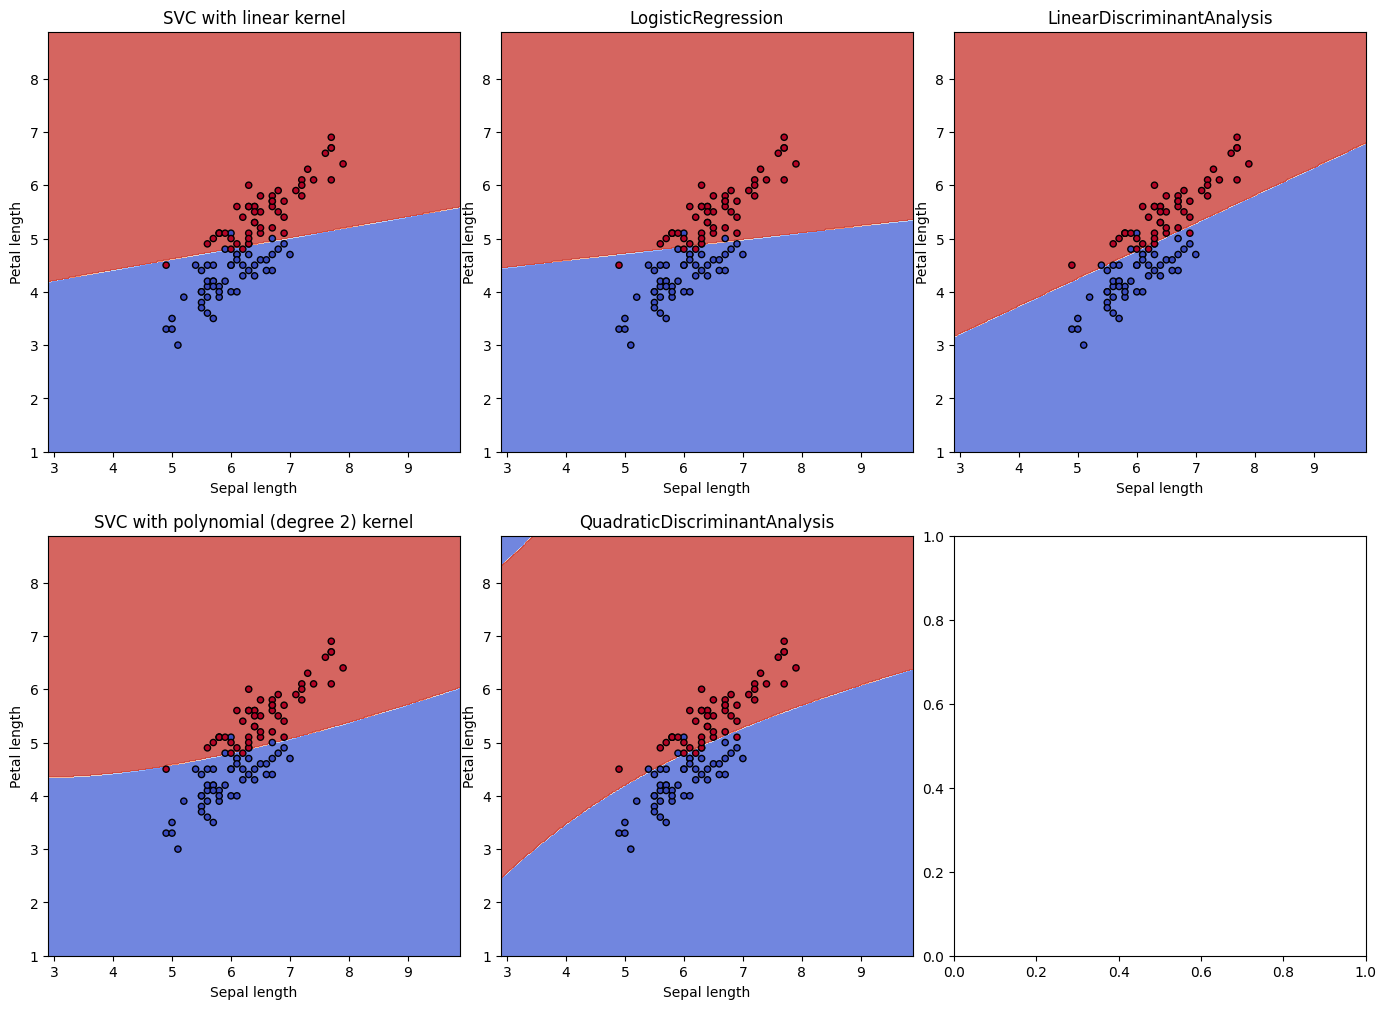

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets, tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

def make_meshgrid(x, y, h=.02):
    d = 2
    x_min, x_max = x.min() - d, x.max() + d
    y_min, y_max = y.min() - d, y.max() + d
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
#X = iris.data[:, :2]
#y = iris.target

X = iris.data[iris.target!=0, 0:3:2]
y = iris.target[iris.target!=0]

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = [svm.SVC(kernel='linear', C=C),
          LogisticRegression(random_state=0),
          LinearDiscriminantAnalysis(solver="svd", store_covariance=True),
          svm.SVC(kernel='poly', degree=2, gamma='auto', C=C),
          QuadraticDiscriminantAnalysis()
          ]
models = [clf.fit(X, y) for clf in models]

# title for the plots
titles = ['SVC with linear kernel',
          'LogisticRegression',
          'LinearDiscriminantAnalysis',
          'SVC with polynomial (degree 2) kernel',
          'QuadraticDiscriminantAnalysis'
          ]

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 3,figsize=(17,12))
plt.subplots_adjust(wspace=0.1, hspace=0.2)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Petal length')
    ax.set_title(title)

plt.show()

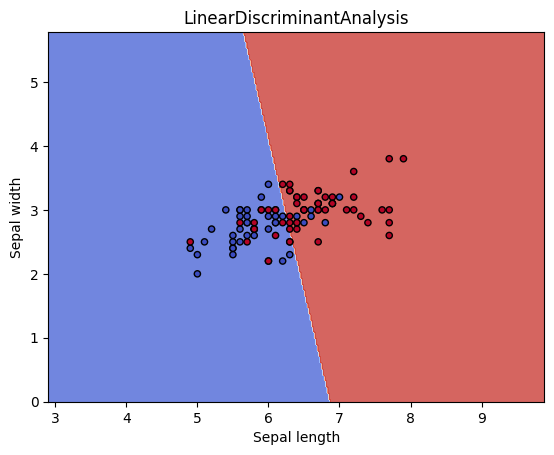

In [18]:
iris = datasets.load_iris()

X = iris.data[iris.target!=0, 0:2]
y = iris.target[iris.target!=0]

models = [LinearDiscriminantAnalysis(solver="svd", store_covariance=True)]
models = [clf.fit(X, y) for clf in models]

# title for the plot
titles = ['LinearDiscriminantAnalysis']

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title in zip(models, titles):
    plot_contours(plt, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title(title)

plt.show()

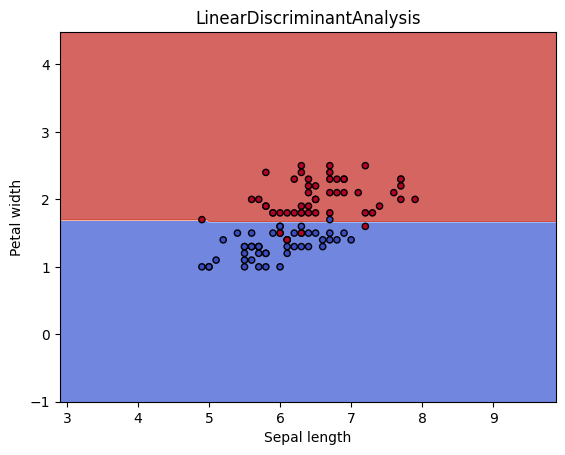

In [19]:
iris = datasets.load_iris()

X = iris.data[iris.target!=0, 0:4:3]
y = iris.target[iris.target!=0]

models = [LinearDiscriminantAnalysis(solver="svd", store_covariance=True)]
models = [clf.fit(X, y) for clf in models]

# title for the plot
titles = ['LinearDiscriminantAnalysis']

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title in zip(models, titles):
    plot_contours(plt, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('Sepal length')
    plt.ylabel('Petal width')
    plt.title(title)

plt.show()

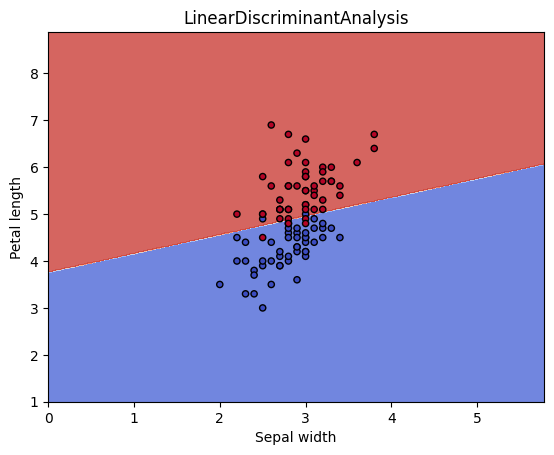

In [ ]:
iris = datasets.load_iris()

X = iris.data[iris.target!=0, 1:3]
y = iris.target[iris.target!=0]

models = [LinearDiscriminantAnalysis(solver="svd", store_covariance=True)]
models = [clf.fit(X, y) for clf in models]

# title for the plot
titles = ['LinearDiscriminantAnalysis']

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title in zip(models, titles):
    plot_contours(plt, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('Sepal width')
    plt.ylabel('Petal length')
    plt.title(title)

plt.show()

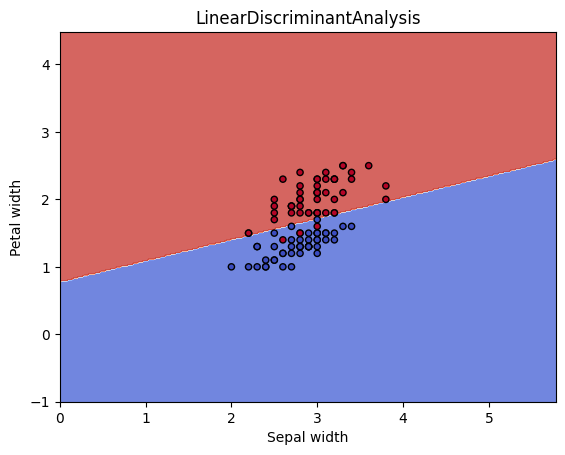

In [ ]:
iris = datasets.load_iris()

X = iris.data[iris.target!=0, 1:4:2]
y = iris.target[iris.target!=0]

models = [LinearDiscriminantAnalysis(solver="svd", store_covariance=True)]
models = [clf.fit(X, y) for clf in models]

# title for the plot
titles = ['LinearDiscriminantAnalysis']

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title in zip(models, titles):
    plot_contours(plt, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('Sepal width')
    plt.ylabel('Petal width')
    plt.title(title)

plt.show()

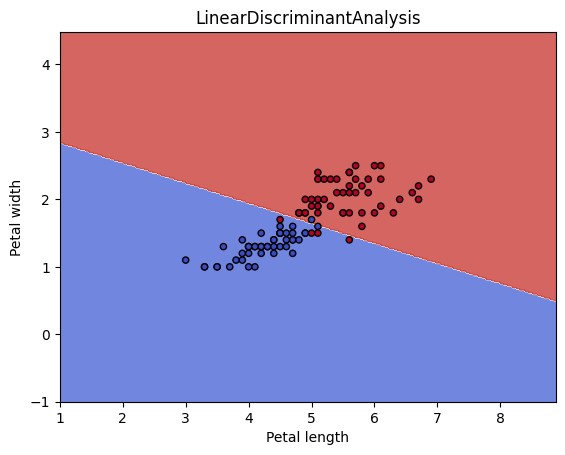

In [ ]:
iris = datasets.load_iris()

X = iris.data[iris.target!=0, 2:4]
y = iris.target[iris.target!=0]

models = [LinearDiscriminantAnalysis(solver="svd", store_covariance=True)]
models = [clf.fit(X, y) for clf in models]

# title for the plot
titles = ['LinearDiscriminantAnalysis']

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title in zip(models, titles):
    plot_contours(plt, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('Petal length')
    plt.ylabel('Petal width')
    plt.title(title)

plt.show()

In [20]:
iris_frame=iris_frame[iris_frame['name'] != 'setosa']

In [21]:
iris_frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [22]:
class QDA_hm:

  def fit(self, X, label):
    self.priors = dict()
    self.means = dict()
    self.covs = dict()

    self.classes =np.unique(label)
    #class prior - априорная вероятность класса, т.е. вероятность класса Вообще (дальше в формуле попонятнее)
    for c in self.classes:
      X_c = X[label == c]
      self.priors[c] = X_c.shape[0] / X.shape[0]
      self.means[c] = np.mean(X_c, axis=0)
      self.covs[c] = np.cov(X_c, rowvar=False)

  def predict(self, X):
    preds = list()
    for x in X:
      posts = list()
      for c in self.classes:
        prior = np.log(self.priors[c])
        inv_cov_mtx = np.linalg.inv(self.covs[c])
        inv_cov_mtx_det = np.linalg.det(inv_cov_mtx)
        diff = x - self.means[c]
        likelihood = 0.5 * np.log(inv_cov_mtx_det) - 0.5 * diff.T @ inv_cov_mtx @ diff
        post = prior + likelihood
        posts.append(post)
      pred = self.classes[np.argmax(posts)]
      preds.append(pred)
    return np.array(preds)

In [24]:
X = iris.data[iris.target!=0, :3:2]
y = iris.target[iris.target!=0]

C = 1.0  # SVM regularization parameter
models = [QDA_hm()]


titles = ['Quadratic Discriminant']

for clf in models:
  clf.fit(X, y)

now predicting Quadratic Discriminant


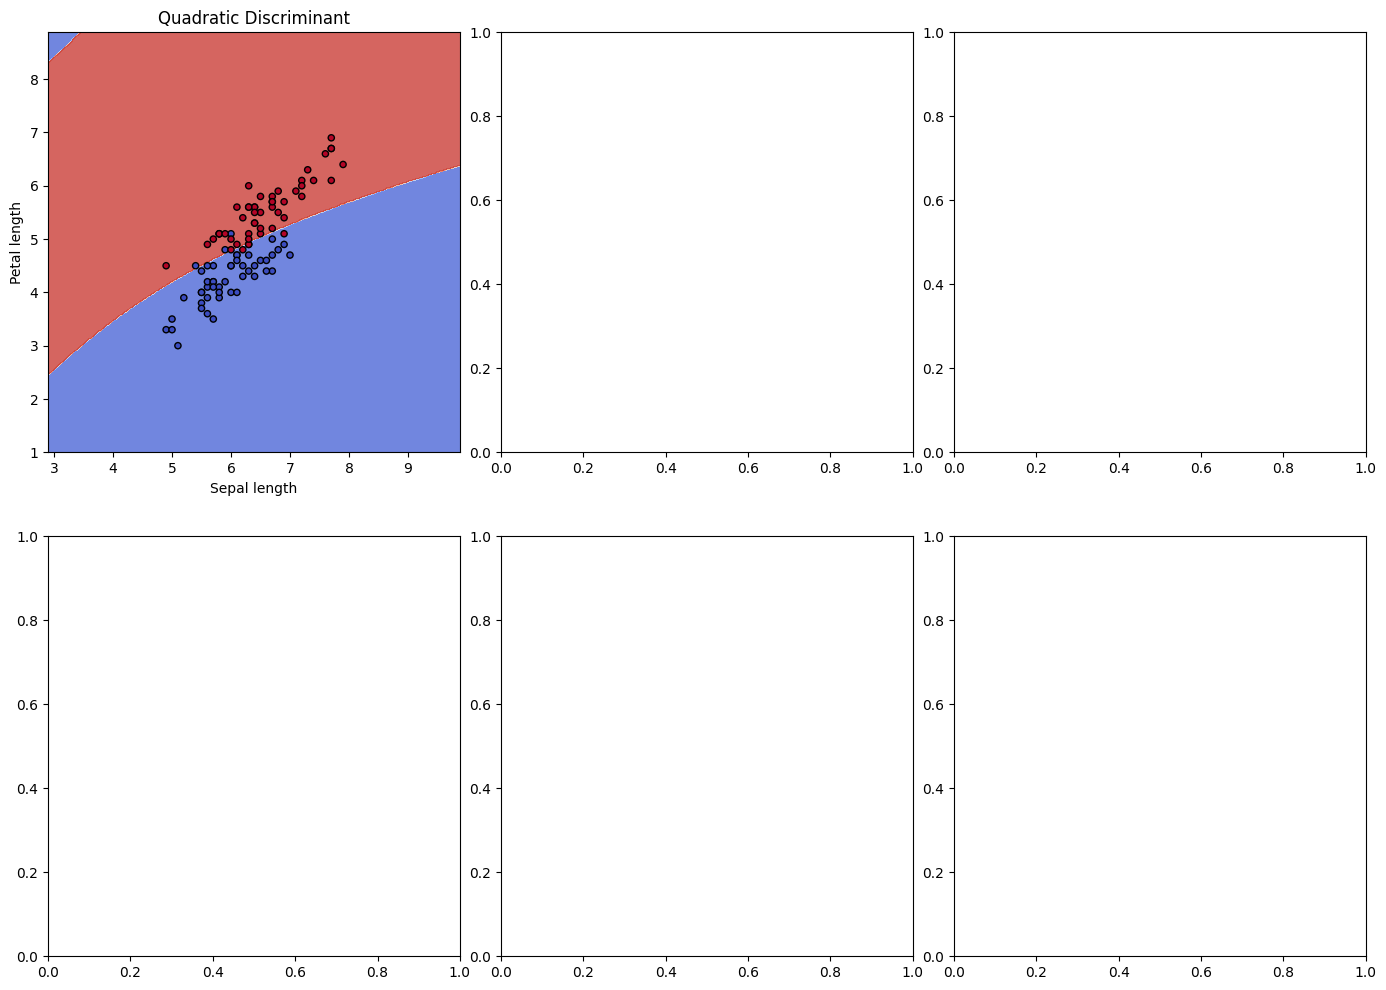

In [25]:
# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 3,figsize=(17,12))
plt.subplots_adjust(wspace=0.1, hspace=0.2)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Petal length')
    ax.set_title(title)

plt.show()